In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from fancyimpute import KNN, SoftImpute, BiScaler, MatrixFactorization, IterativeSVD, NuclearNormMinimization
from ppca import PPCA
ppca = PPCA()
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("EC_2017.csv")

In [3]:
df.head()

,Unnamed: 0,community,rate_category,consumption_period,calendar_month,contract_account,consumption_unit,business_partner,billing_portion
0,0,345.0,ENORATE,22.03.2017,201201,2.012349e+09,0.0,10498095,B28
1,1,345.0,ENORATE,22.03.2017,201202,2.012349e+09,0.0,10498095,B28
2,2,345.0,ENORATE,22.03.2017,201203,2.012349e+09,0.0,10498095,B28
3,3,345.0,ENORATE,22.03.2017,201204,2.012349e+09,0.0,10498095,B28
4,4,345.0,ENORATE,22.03.2017,201205,2.012349e+09,0.0,10498095,B28


In [4]:
X = df[['calendar_month', 'consumption_unit']]
X.head()

,calendar_month,consumption_unit
0,201201,0.0
1,201202,0.0
2,201203,0.0
3,201204,0.0
4,201205,0.0


In [5]:
X.iloc[69420,1]

427.0

In [6]:
X.iloc[42069,1]

536.0

In [7]:
X.replace(427, np.nan, inplace=True)
X.replace(536, np.nan, inplace=True)

C:\Users\UAE12\AppData\Local\Temp\ipykernel_19996\2040905121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(427, np.nan, inplace=True)
C:\Users\UAE12\AppData\Local\Temp\ipykernel_19996\2040905121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(536, np.nan, inplace=True)


In [8]:
X.iloc[69420,1]

nan

In [9]:
X.iloc[42069,1]

nan

In [10]:
booey = pd.DataFrame(X).to_numpy()

In [11]:
print(booey)

[[201201.         0.   ]
 [201202.         0.   ]
 [201203.         0.   ]
 ...
 [201712.      8567.934]
 [201711.      2691.308]
 [201712.      8028.692]]


In [12]:
ppca.fit(booey)

In [13]:
XX = pd.DataFrame(ppca.data)

In [14]:
XX.iloc[69420,1]

-1.3061773884714967e-13

In [15]:
print(ppca.data)

[[-5.49035985e+01 -8.38861183e-02]
 [-5.47951287e+01 -8.38861183e-02]
 [-5.46866588e+01 -8.38861183e-02]
 ...
 [ 5.24507005e-01  8.09786498e-02]
 [ 4.16037132e-01 -3.20997870e-02]
 [ 5.24507005e-01  7.06025186e-02]]


In [16]:
print(ppca.C)

[[-0.71533349  0.69878322]
 [-0.69878322 -0.71533349]]


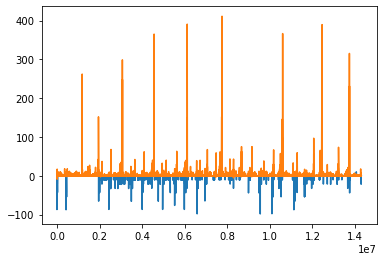

In [17]:
plt.plot(XX)

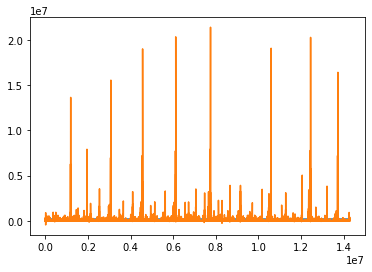

In [18]:
plt.plot(X)

In [19]:
X.shape

(14291432, 2)

In [20]:
XX.shape

(14291432, 2)

In [21]:
X.describe()

,calendar_month,consumption_unit
count,1.429143e+07,1.429072e+07
mean,2.017072e+05,4.359517e+03
std,9.219150e+00,5.196947e+04
min,2.008020e+05,-4.479570e+05
25%,2.017050e+05,1.753380e+02
50%,2.017070e+05,5.943200e+02
75%,2.017100e+05,1.987432e+03
max,2.018010e+05,2.138052e+07


In [22]:
XX.describe()

,0,1
count,1.429143e+07,1.429143e+07
mean,-8.751604e-12,7.404242e-15
std,1.000000e+00,9.999753e-01
min,-9.818308e+01,-8.703505e+00
25%,-2.347821e-01,-8.051171e-02
50%,-1.784236e-02,-7.244875e-02
75%,3.075673e-01,-4.563616e-02
max,1.017833e+01,4.113216e+02


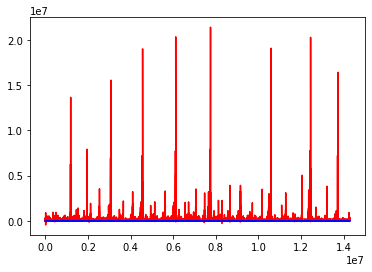

In [23]:
plt.plot(X, color='r')
plt.plot(XX, color='b')
plt.show()

In [24]:
print(ppca.transform())

[[ 39.33300112 -38.30570706]
 [ 39.25540898 -38.22991013]
 [ 39.17781685 -38.1541132 ]
 ...
 [ -0.43178395   0.30858996]
 [ -0.2751745    0.31368182]
 [ -0.42453328   0.31601235]]


In [29]:
scaler = MinMaxScaler()

In [32]:
baba = df[['calendar_month', 'consumption_unit']]

In [38]:
scaled = scaler.fit_transform(X)

In [39]:
unscaled = scaler.inverse_transform(XX)

In [40]:
print(unscaled)

[[  145953.30505186 -2279063.30629713]
 [  146061.66645586 -2279063.30629713]
 [  146170.02785987 -2279063.30629713]
 ...
 [  201325.98249838  1319683.69216603]
 [  201217.62109437 -1148646.50022231]
 [  201325.98249838  1093188.53838155]]


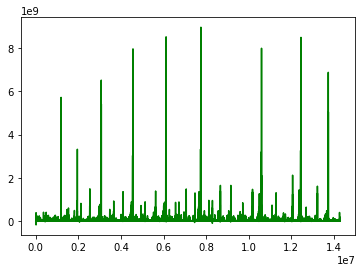

In [41]:
plt.plot(X, color='r')
plt.plot(XX, color='b')
plt.plot(unscaled, color='g')
plt.show()